Project Title:

Flood Prediction and Climate Risk Analysis

Problem Statement:
Floods are one of the most frequent and devastating climate disasters, causing human casualties, economic damage, and environmental loss. Predicting flood occurrence (Yes/No) using factors such as rainfall, temperature, humidity, and water level can help improve disaster preparedness, risk management, and climate resilience.

Description:
This project uses a dataset containing environmental variables (rainfall, temperature, humidity, and water level) to explore flood risk patterns. Through exploratory data analysis (EDA), we can identify how these features affect flood occurrence. The insights can guide disaster management authorities in early warning systems, resource allocation, and policy decisions. Later, the dataset can also be extended for AI/ML modeling.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML-related imports (future scope, not required for Week 1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
# load the dataset
df = pd.read_csv('fd.csv/flood.csv')
# display first few rows
print(df.head())


   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

In [3]:
# Basic info about the dataset
print(df.info())

# Statistical summary (only for numerical columns)
print(df.describe())

# Checking missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
MonsoonIntensity                   50000 non-null int64
TopographyDrainage                 50000 non-null int64
RiverManagement                    50000 non-null int64
Deforestation                      50000 non-null int64
Urbanization                       50000 non-null int64
ClimateChange                      50000 non-null int64
DamsQuality                        50000 non-null int64
Siltation                          50000 non-null int64
AgriculturalPractices              50000 non-null int64
Encroachments                      50000 non-null int64
IneffectiveDisasterPreparedness    50000 non-null int64
DrainageSystems                    50000 non-null int64
CoastalVulnerability               50000 non-null int64
Landslides                         50000 non-null int64
Watersheds                         50000 non-null int64
DeterioratingInfrastructure        50000 non-null i

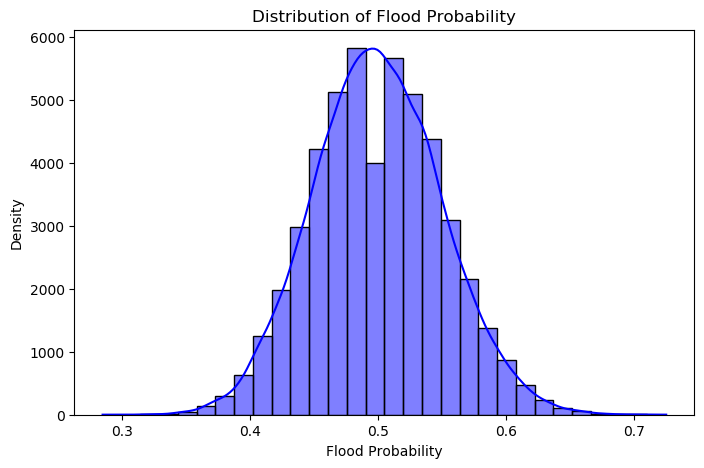

In [ ]:
# Using histplot (recommended in latest versions)
plt.figure(figsize=(8,5))
sns.histplot(df['FloodProbability'], bins=30, kde=True, color="blue")  
plt.title("Distribution of Flood Probability")
plt.xlabel("Flood Probability")
plt.ylabel("Density")
plt.show()



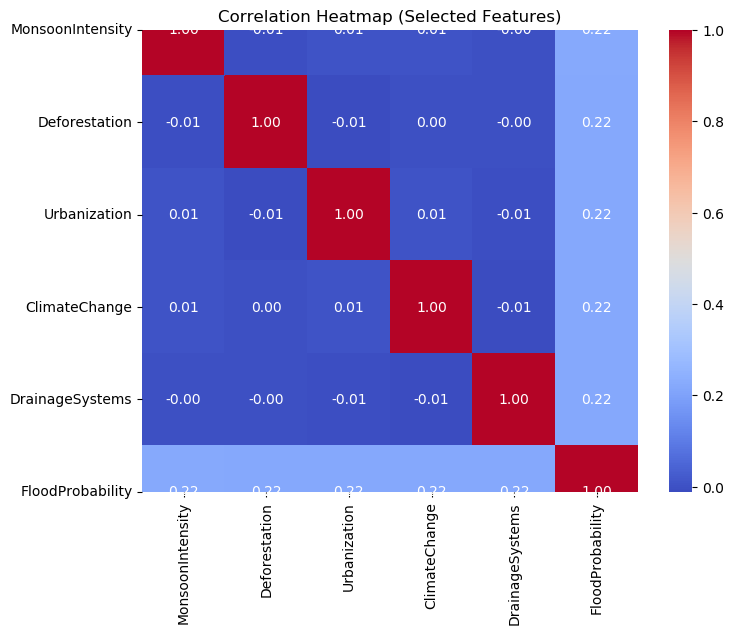

In [7]:
# Correlation Heatmap (only important columns)

features = ['MonsoonIntensity', 'Deforestation', 'Urbanization',
            'ClimateChange', 'DrainageSystems', 'FloodProbability']

plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


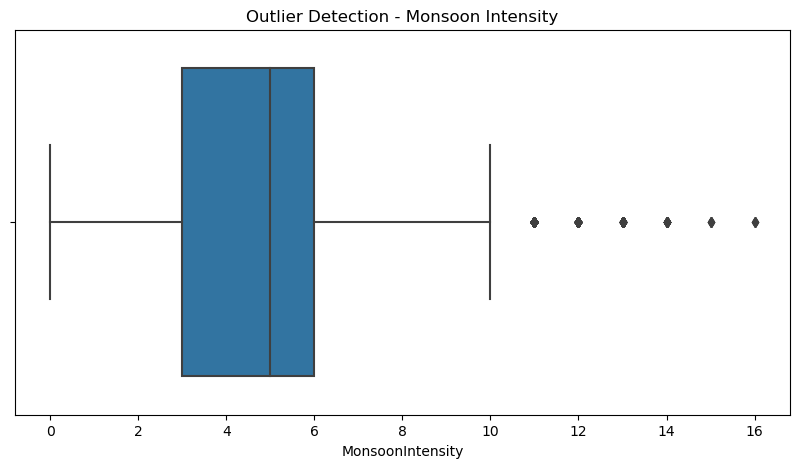

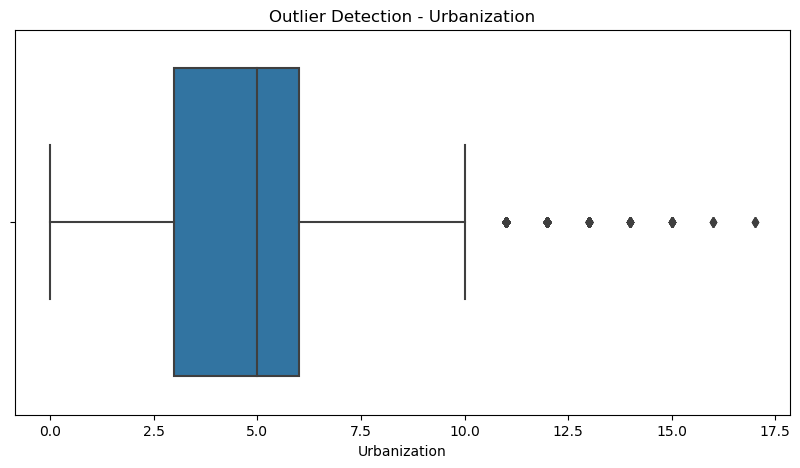

In [10]:
#  Boxplots (outlier detection)

plt.figure(figsize=(10,5))
sns.boxplot(x=df['MonsoonIntensity'])
plt.title("Outlier Detection - Monsoon Intensity")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Urbanization'])
plt.title("Outlier Detection - Urbanization")
plt.show()

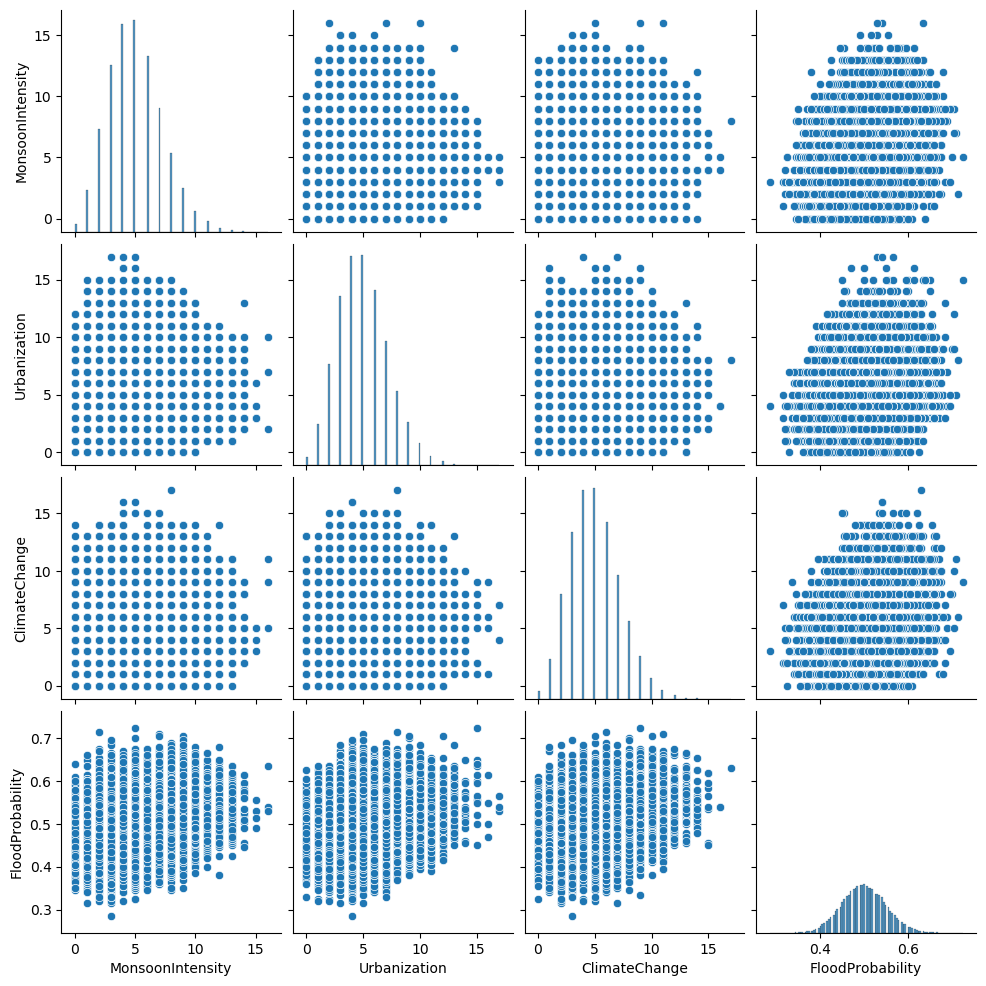

In [11]:
# Pairplot (relationships)

sns.pairplot(df[['MonsoonIntensity','Urbanization',
                 'ClimateChange','FloodProbability']])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#  Feature & Target Split

X = df.drop('FloodProbability', axis=1)   # Features
y = df['FloodProbability']                # Target

In [14]:
#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (40000, 20)
Testing Set Shape: (10000, 20)


In [15]:
#  Feature Scaling (Normalization)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data Shape:", X_train_scaled.shape)
print("Scaled Testing Data Shape:", X_test_scaled.shape)

Scaled Training Data Shape: (40000, 20)
Scaled Testing Data Shape: (10000, 20)
